In [ ]:
import os
print(os.getcwd())  # Print current working directory


/content


In [ ]:
import pandas as pd

# Define the dataset file paths
datasets = {
    "Data_Aotizhongxin": ("Data_Aotizhongxin.csv", "Forest"),
    "Data_Dingling": ("Data_Dingling.csv", "Factory"),
    "Data_Gucheng": ("Data_Gucheng.csv", "Urban"),
    "Data_Huairou": ("Data_Huairou.csv", "Rural"),
    "Data_Wanshouxigong": ("Data_Wanshouxigong.csv", "Urban"),
}

# Load and merge datasets
merged_df = pd.DataFrame()

for data_name, (file_path, category) in datasets.items():
    # Read each dataset
    df = pd.read_csv(file_path)
    # Add a new column for the category (Rural/Urban)
    df['Category'] = category
    # Merge into the main dataframe
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# Save the merged dataset to a new CSV file
output_file = "merged_data.csv"
merged_df.to_csv(output_file, index=False)

# If you're using this in a script, this will download the file in the same directory
print(f"Data successfully merged and saved to {output_file}")


Data successfully merged and saved to merged_data.csv


Fundamental Data Understanding

In [ ]:
import pandas as pd

# Load the merged dataset
merged_df = pd.read_csv("merged_data.csv")

# Check the shape of the dataset (number of rows and columns)
print(f"Shape of the dataset: {merged_df.shape}")

# Data types and missing values
print("\nData Types and Missing Values:")
print(merged_df.info())

# Check for any missing values
missing_values = merged_df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Basic statistical summary for numerical columns
print("\nStatistical Summary:")
print(merged_df.describe())


Shape of the dataset: (175320, 19)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175320 entries, 0 to 175319
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   No        175320 non-null  int64  
 1   year      175320 non-null  int64  
 2   month     175320 non-null  int64  
 3   day       175320 non-null  int64  
 4   hour      175320 non-null  int64  
 5   PM2.5     171321 non-null  float64
 6   PM10      172304 non-null  float64
 7   SO2       171499 non-null  float64
 8   NO2       170002 non-null  float64
 9   CO        167412 non-null  float64
 10  O3        169429 non-null  float64
 11  TEMP      175126 non-null  float64
 12  PRES      175128 non-null  float64
 13  DEWP      175124 non-null  float64
 14  RAIN      175132 non-null  float64
 15  wd        174559 non-null  object 
 16  WSPM      175159 non-null  float64
 17  station   175320 non-null  object 
 18  Category  175320 

Data PreProcessing

In [ ]:
# Handling missing values
# Option 1: Drop rows with missing values
merged_df_cleaned = merged_df.dropna()

# Option 2: Alternatively, fill missing values with the mean or median of the column
# merged_df_cleaned = merged_df.fillna(merged_df.mean())  # For numerical columns

# Remove duplicates
merged_df_cleaned = merged_df_cleaned.drop_duplicates()

# Feature engineering example: Creating a new column that categorizes based on some feature
# For example, if there's a column 'Revenue', we could create a 'High/Low' revenue category
# merged_df_cleaned['Revenue_Category'] = merged_df_cleaned['Revenue'].apply(lambda x: 'High' if x > 100000 else 'Low')

print("\nData after preprocessing:")
print(merged_df_cleaned.info())  # Check cleaned data info



Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 160101 entries, 0 to 175319
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   No        160101 non-null  int64  
 1   year      160101 non-null  int64  
 2   month     160101 non-null  int64  
 3   day       160101 non-null  int64  
 4   hour      160101 non-null  int64  
 5   PM2.5     160101 non-null  float64
 6   PM10      160101 non-null  float64
 7   SO2       160101 non-null  float64
 8   NO2       160101 non-null  float64
 9   CO        160101 non-null  float64
 10  O3        160101 non-null  float64
 11  TEMP      160101 non-null  float64
 12  PRES      160101 non-null  float64
 13  DEWP      160101 non-null  float64
 14  RAIN      160101 non-null  float64
 15  wd        160101 non-null  object 
 16  WSPM      160101 non-null  float64
 17  station   160101 non-null  object 
 18  Category  160101 non-null  object 
dtypes: float64(11), int64(

Statistical Based Analysis and Visualization

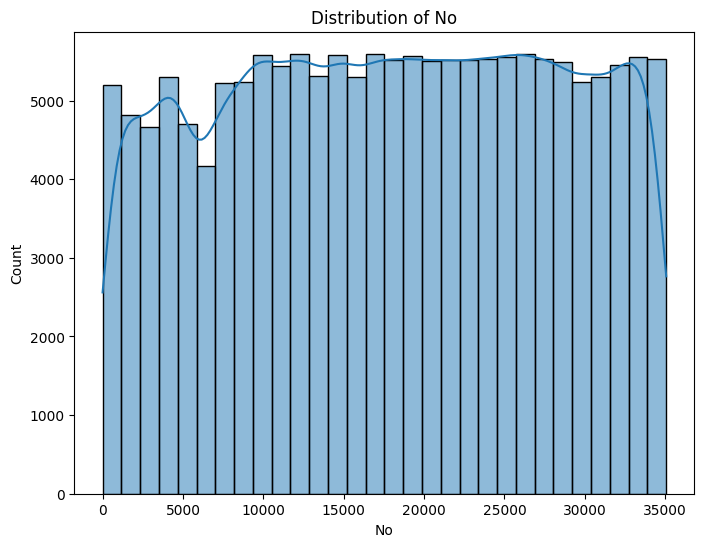

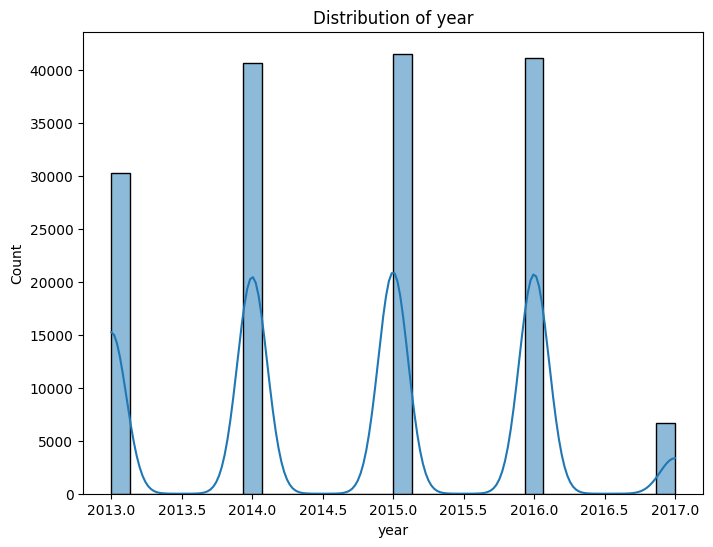

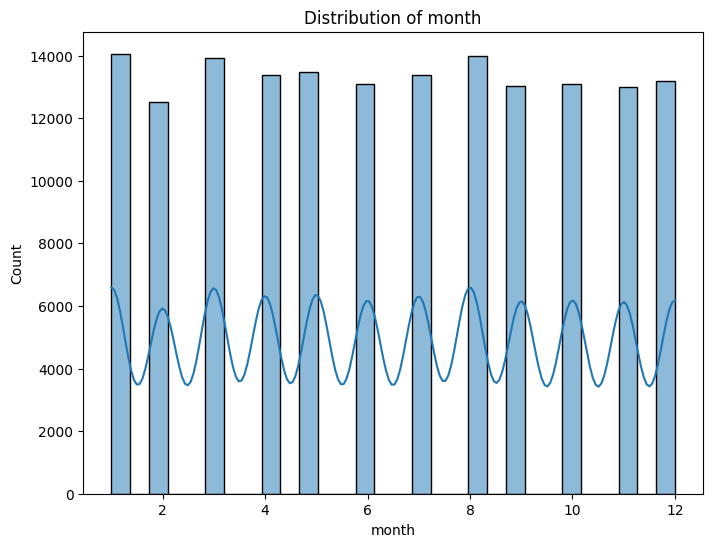

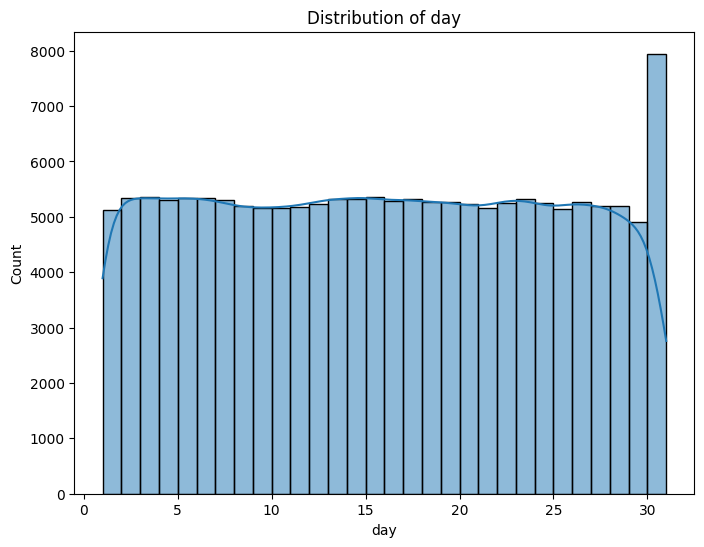

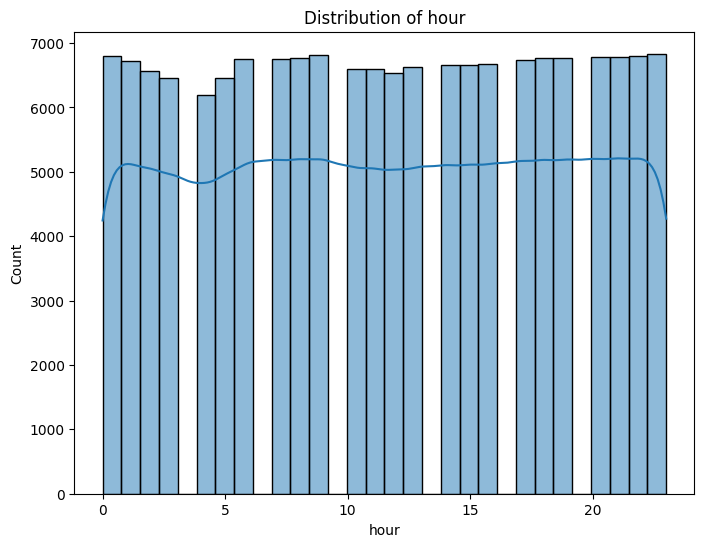

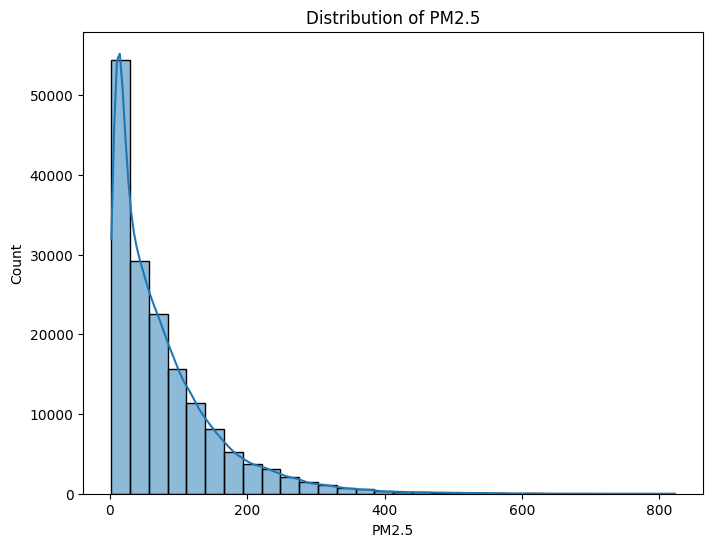

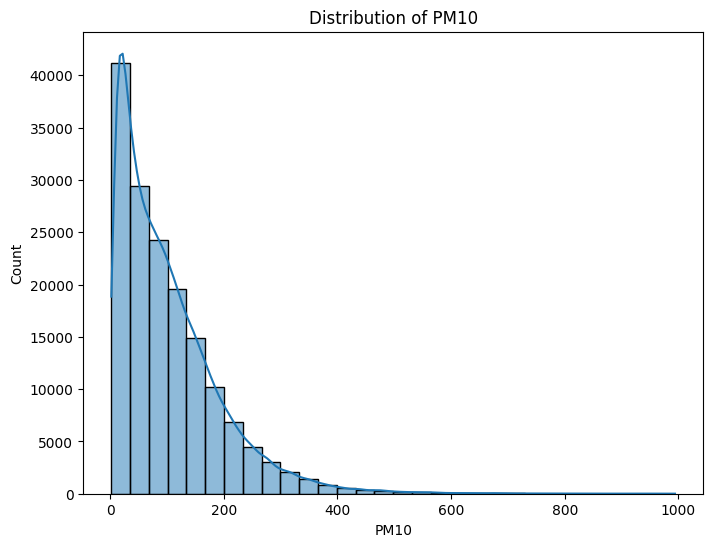

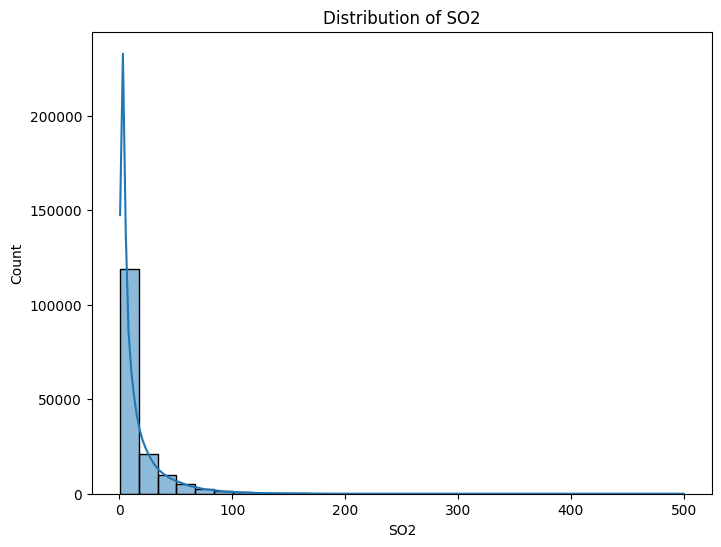

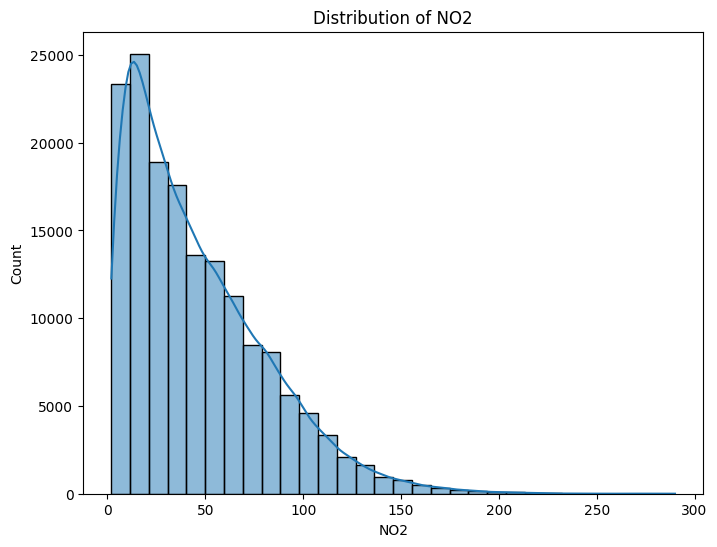

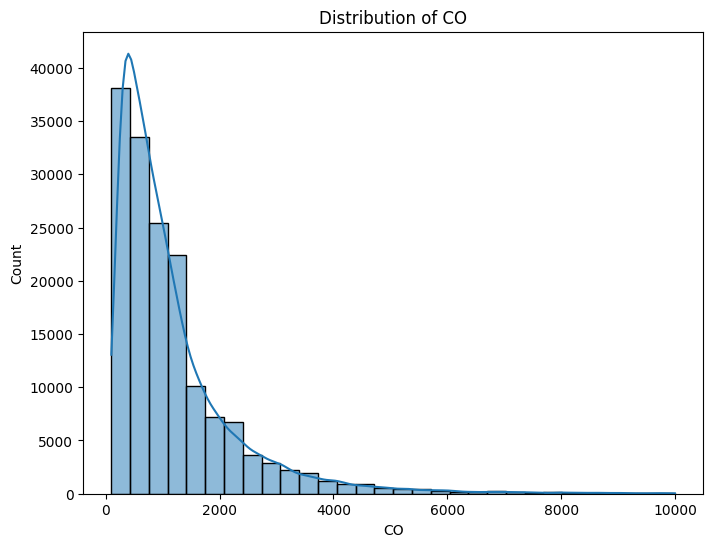

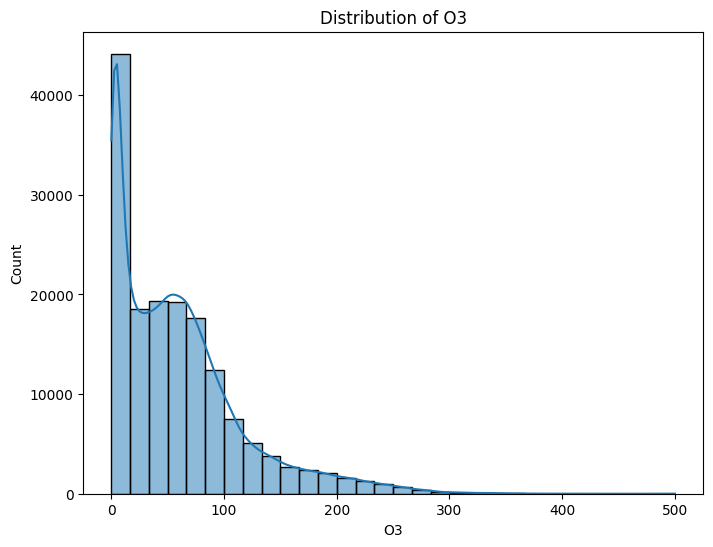

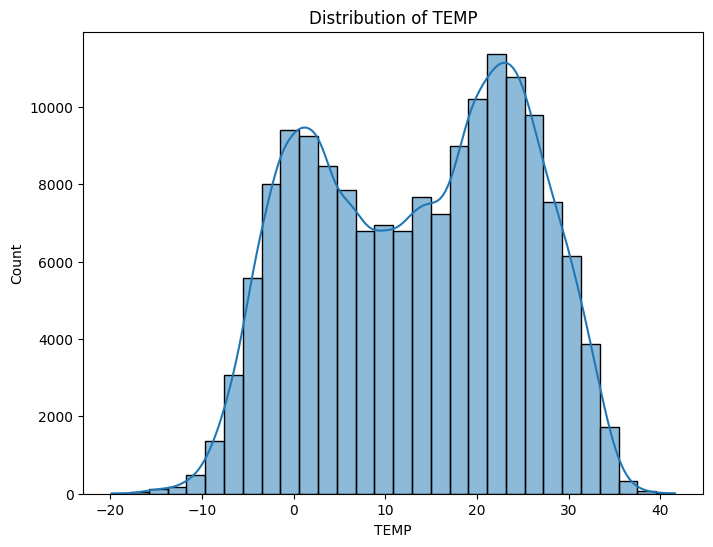

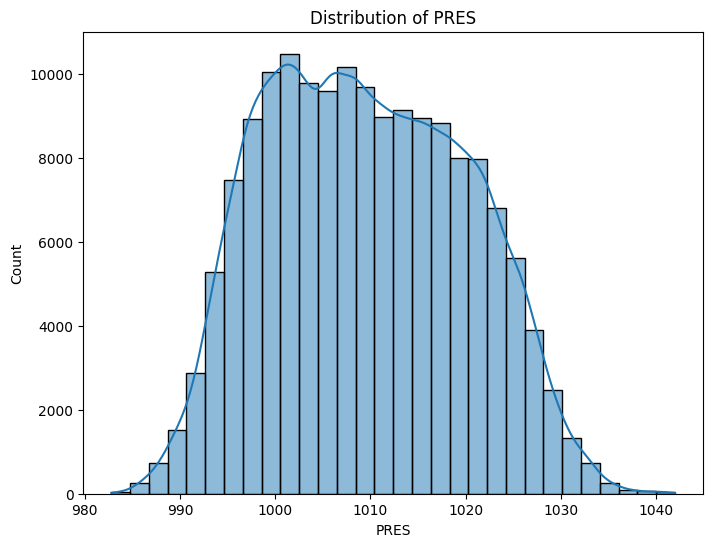

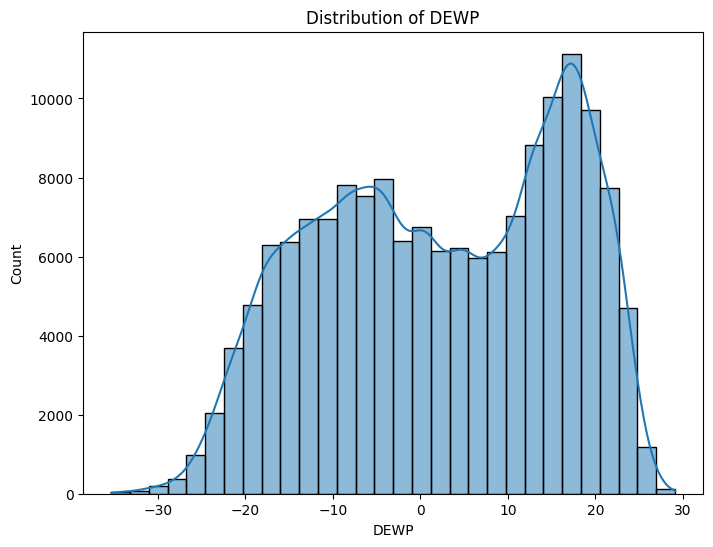

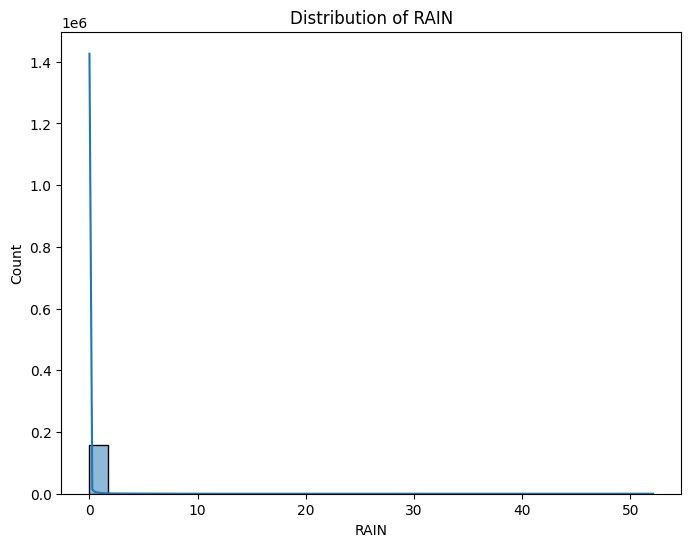

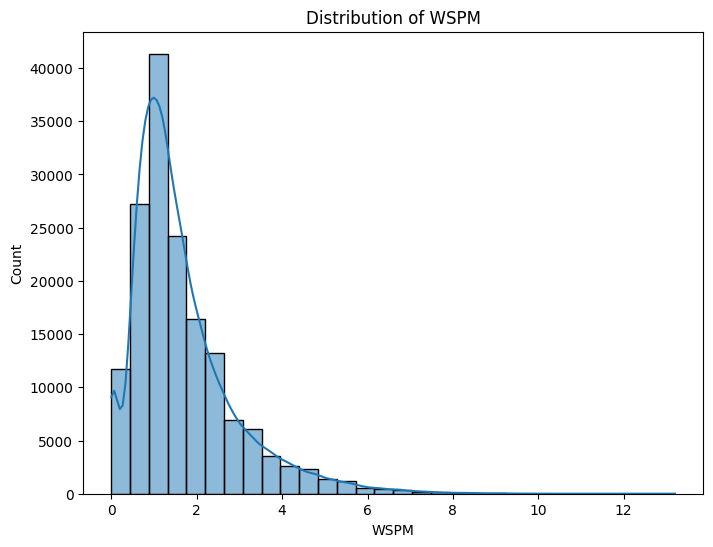

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis: Distribution of each numerical column
numerical_columns = merged_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_df_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


Bivariate Analysis

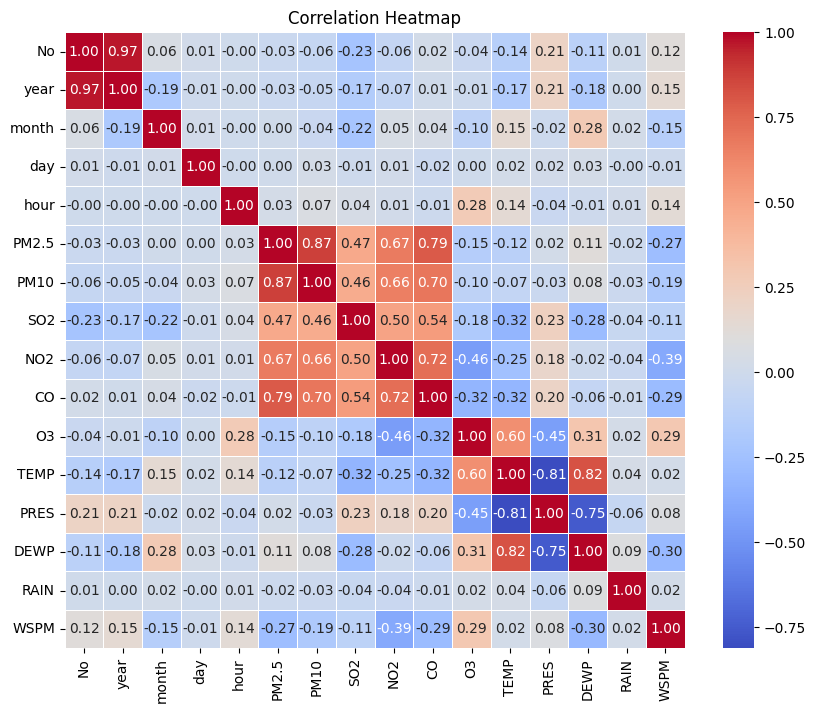

In [ ]:
# Bivariate analysis: Scatter plot between two variables
# Example: Let's assume 'Revenue' and 'Employees' are two columns
if 'Revenue' in merged_df_cleaned.columns and 'Employees' in merged_df_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_df_cleaned, x='Revenue', y='Employees')
    plt.title('Revenue vs Employees')
    plt.show()

# Correlation heatmap to understand relationships between numerical features
# Select only numerical features for correlation calculation
numerical_features = merged_df_cleaned.select_dtypes(include=['number']) # This line is changed

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Multivariate Analysis

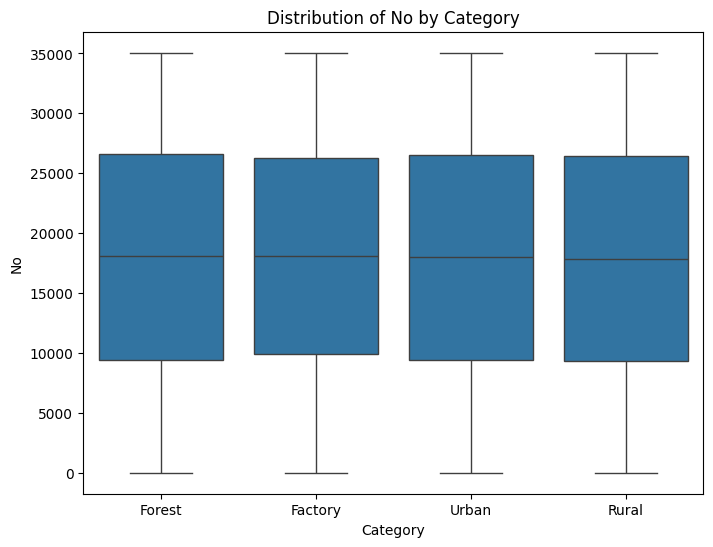

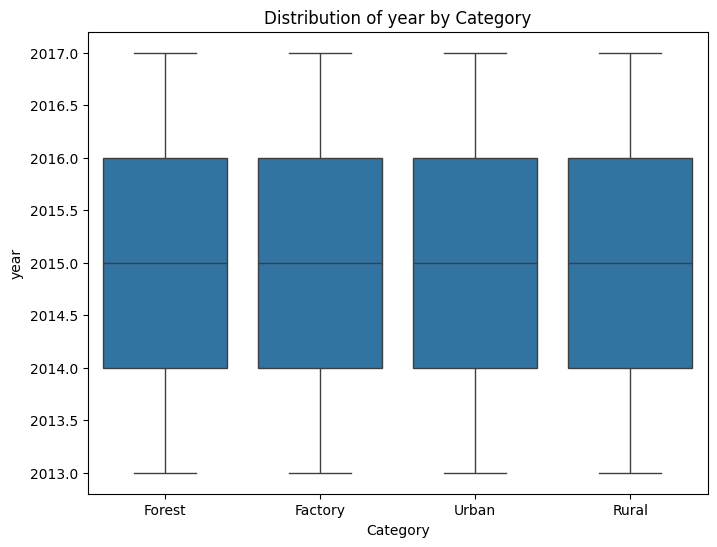

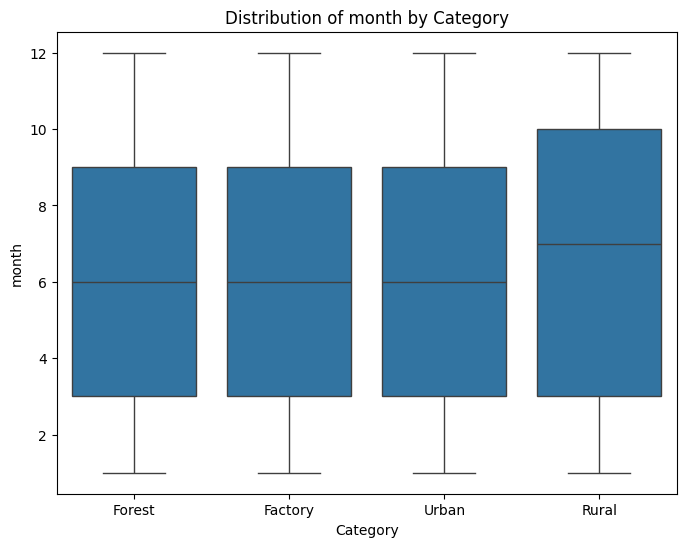

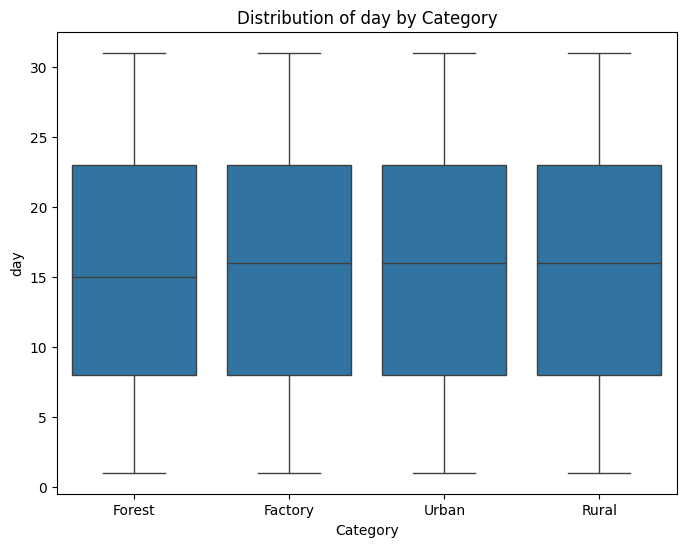

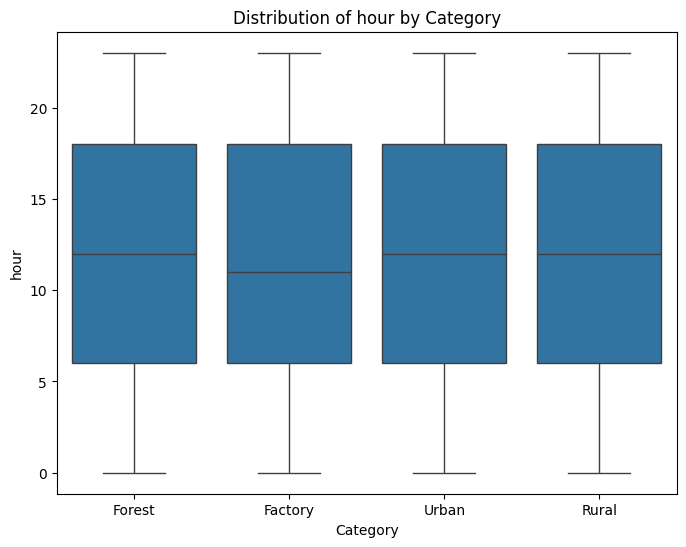

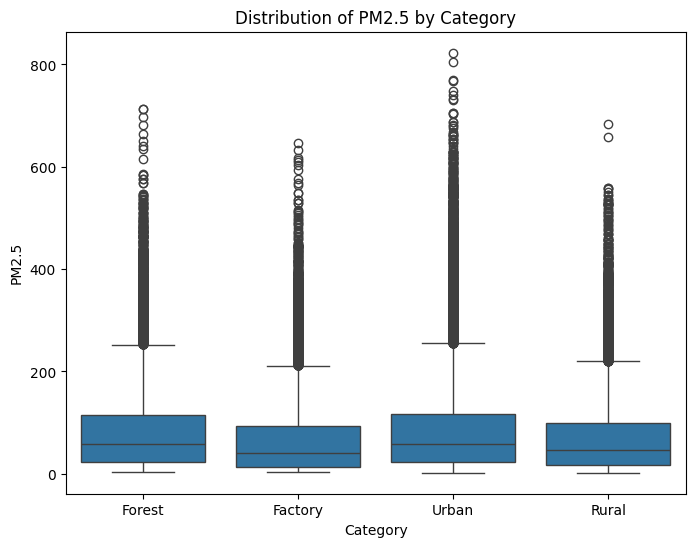

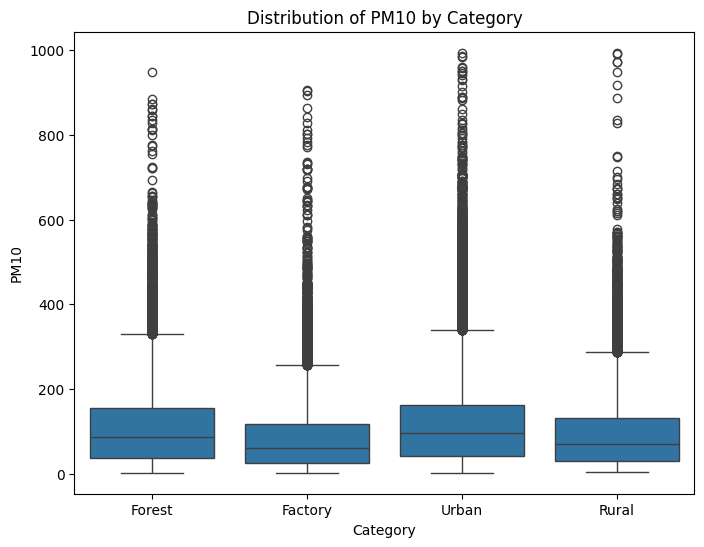

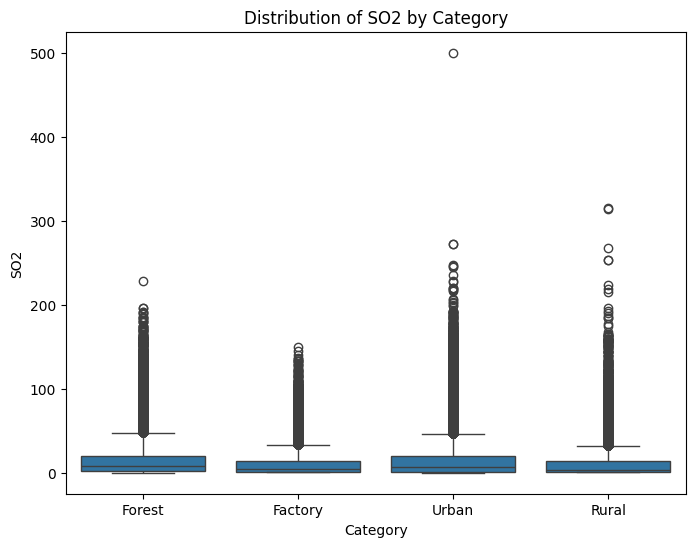

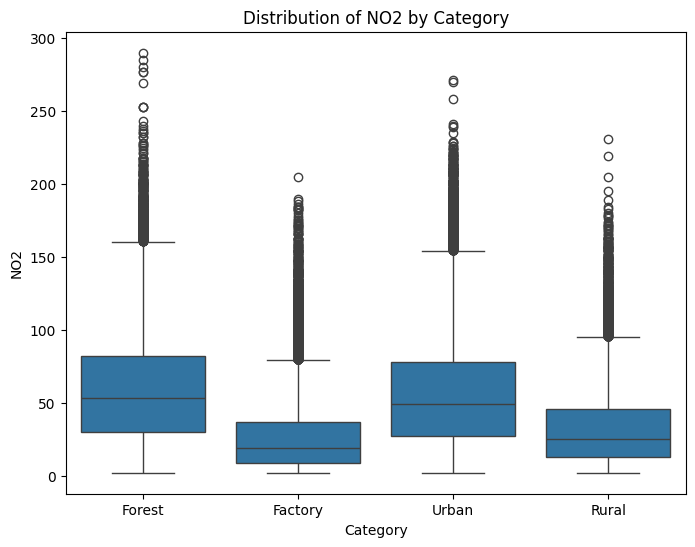

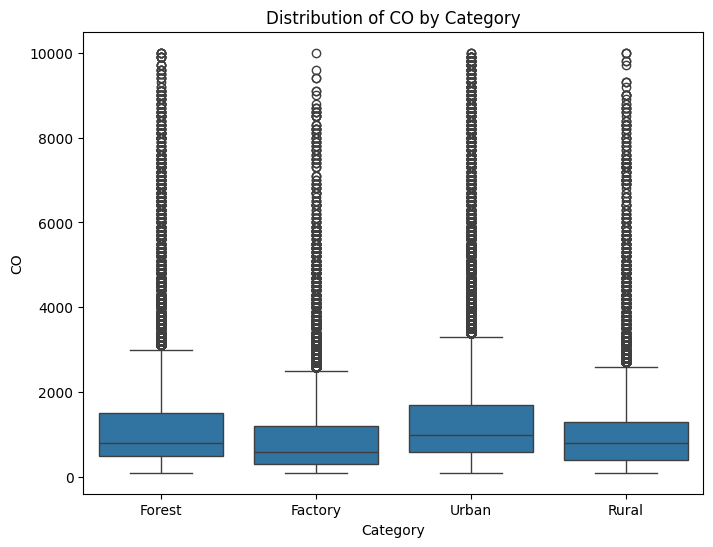

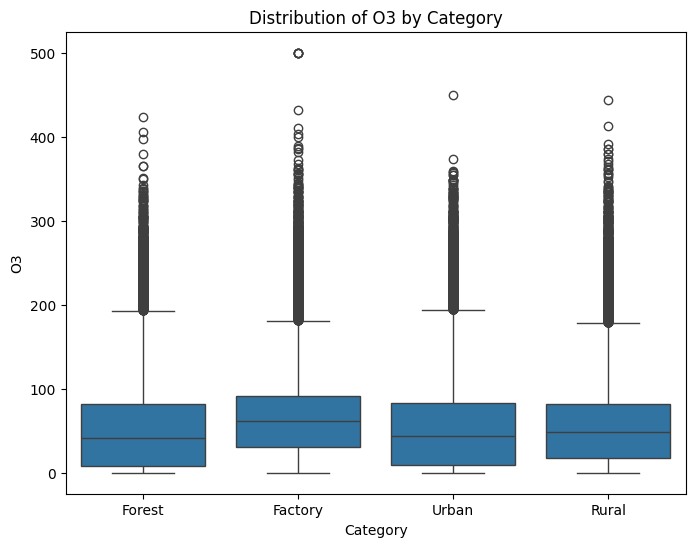

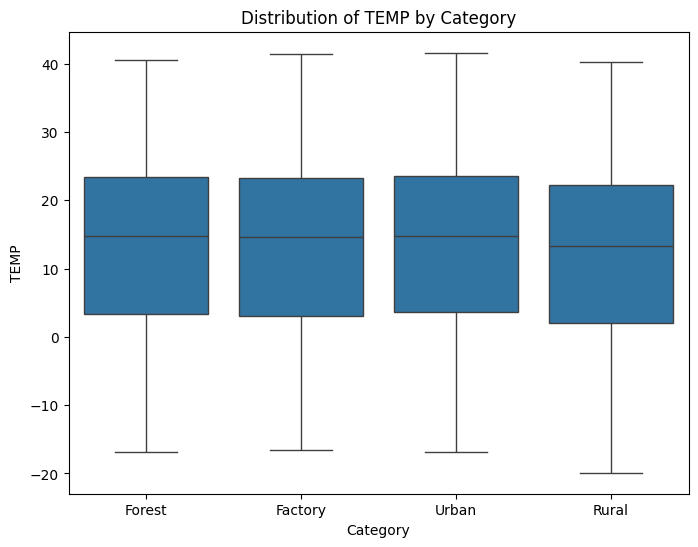

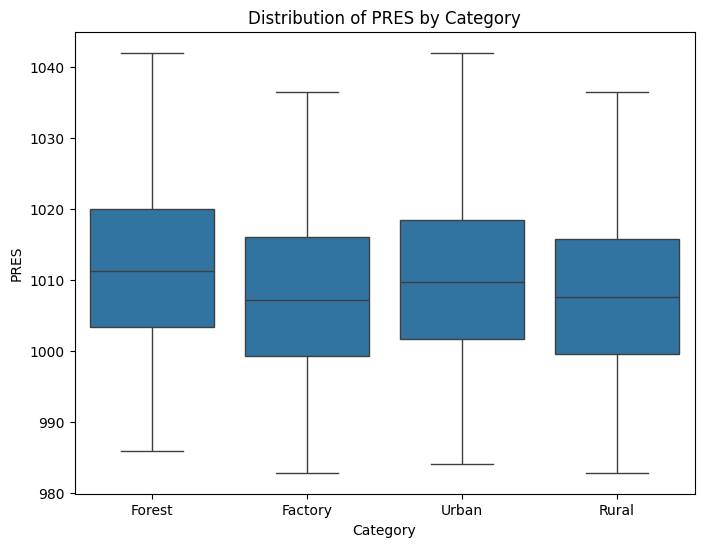

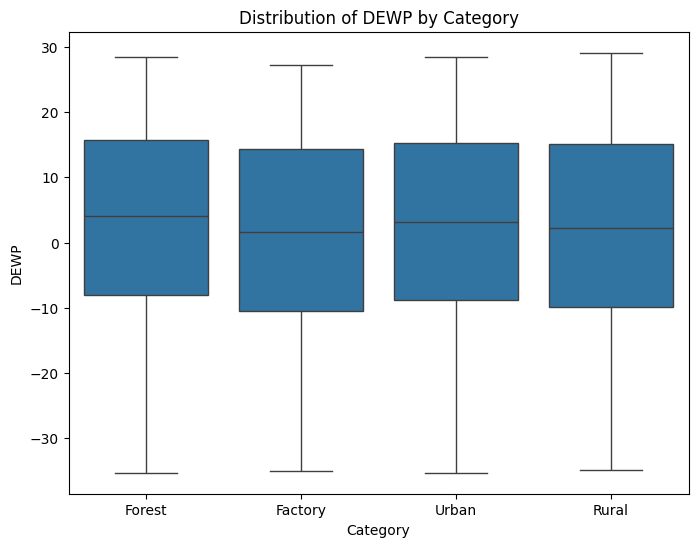

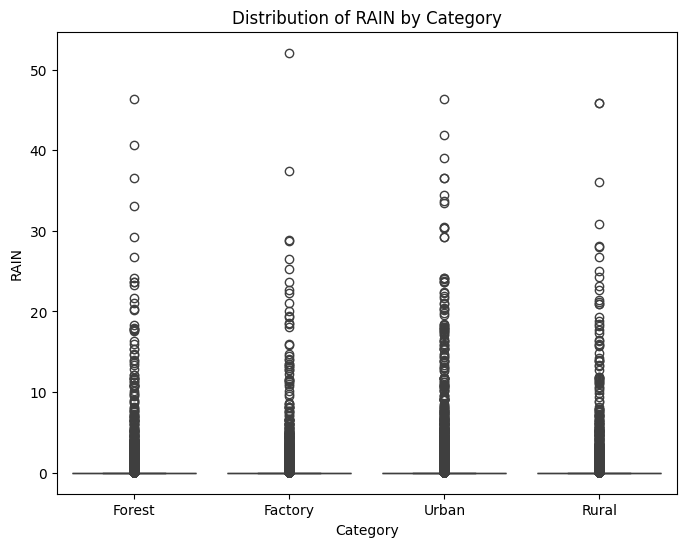

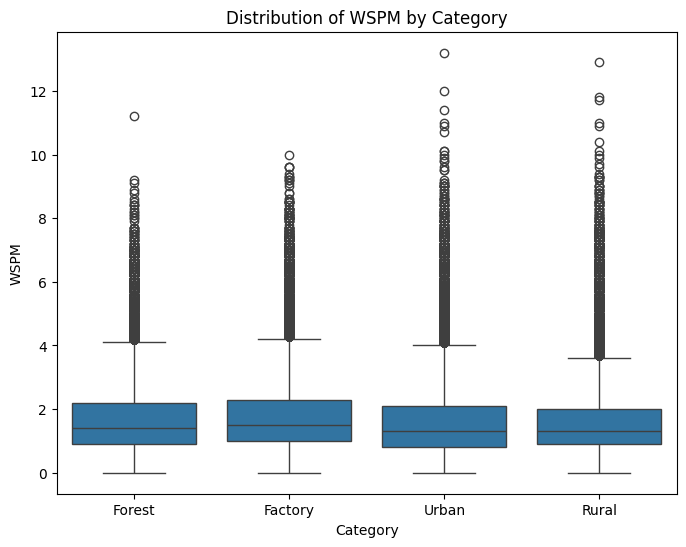

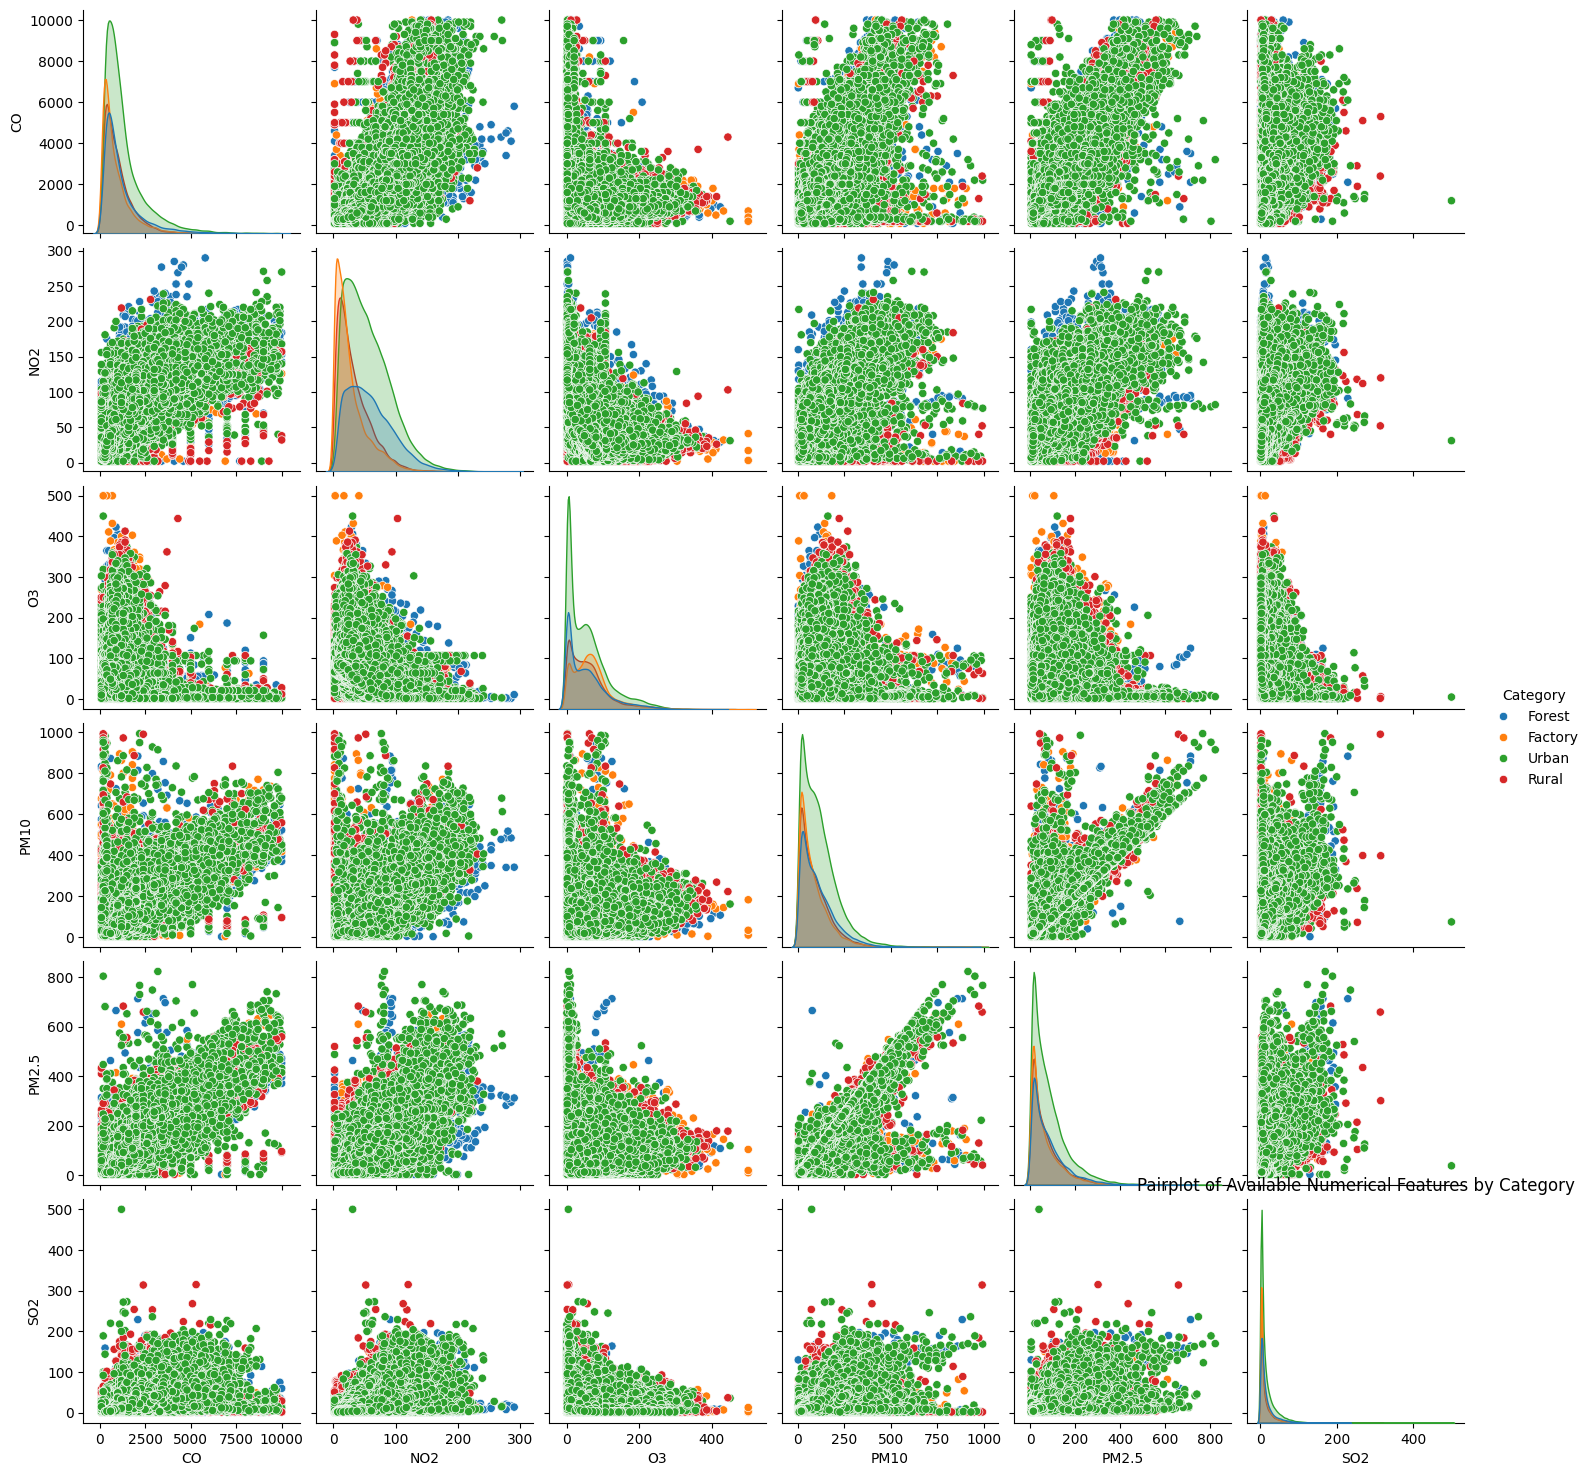

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Multivariate analysis: Boxplot to see the distribution of numerical features across different 'Category'
# Instead of 'Revenue', use available numerical columns
numerical_columns = merged_df_cleaned.select_dtypes(include=['number']).columns
# Exclude 'Category' from numerical_columns if present
numerical_columns = [col for col in numerical_columns if col != 'Category']

# Iterate over available numerical columns for box plots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=merged_df_cleaned, x='Category', y=col)
    plt.title(f'Distribution of {col} by Category')
    plt.show()

# Pairplot to visualize relationships between multiple features
# Use available numerical columns and 'Category'
sns.pairplot(merged_df_cleaned[['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2', 'Category']], hue='Category')  # Replace with your available numerical columns
plt.title('Pairplot of Available Numerical Features by Category')
plt.show()

Data (Scaling, Encoding, and Handling Missing Values



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Load the cleaned dataset
merged_df = pd.read_csv("merged_data.csv")

# Split data into features (X) and target (y)
# Assuming 'Category' or another relevant column is the target,
# as 'Revenue' is not present in the dataset
# Replace 'Category' with the actual target column name if different

# Assuming 'Category' is the target variable
X = merged_df.drop(columns=['Category'])
y = merged_df['Category']

# If a different column is the target, replace 'Category' accordingly
# For example, if 'CO' is the target:
# X = merged_df.drop(columns=['CO'])
# y = merged_df['CO']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical feature columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features (impute missing, scale)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

# Preprocessing pipeline for categorical features (impute missing, one-hot encode)
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Now you can use the preprocessor to transform your data:
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

Model Building and Evaluation (Random Forest & Logistic Regression)

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np  # Import NumPy for numerical operations


# Load the cleaned dataset
merged_df = pd.read_csv("merged_data.csv")

# Split data into features (X) and target (y)
# Assuming 'Category' is the target variable
X = merged_df.drop(columns=['Category'])
y = merged_df['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical feature columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features (impute missing, scale)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

# Preprocessing pipeline for categorical features (impute missing, one-hot encode)
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Create models
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Build pipelines for each model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', logreg_model)])

# Evaluate models using cross-validation
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f"Random Forest Model Accuracy (CV): {np.mean(rf_scores)}")
print(f"Logistic Regression Model Accuracy (CV): {np.mean(logreg_scores)}")

Random Forest Model Accuracy (CV): 1.0
Logistic Regression Model Accuracy (CV): 1.0


Model Training on Full Data (Using Best Model)

In [ ]:
# Fit the Random Forest model on the full training data
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the Random Forest model on the test set
from sklearn.metrics import classification_report
print("\nRandom Forest Test Set Evaluation:")
print(classification_report(y_test, y_pred_rf))



Random Forest Test Set Evaluation:
              precision    recall  f1-score   support

     Factory       1.00      1.00      1.00      7125
      Forest       1.00      1.00      1.00      6940
       Rural       1.00      1.00      1.00      7039
       Urban       1.00      1.00      1.00     13960

    accuracy                           1.00     35064
   macro avg       1.00      1.00      1.00     35064
weighted avg       1.00      1.00      1.00     35064



Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

# Get the best Random Forest model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nBest Random Forest Model Test Set Evaluation:")
print(classification_report(y_test, y_pred_best_rf))


Best Parameters for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 100}

Best Random Forest Model Test Set Evaluation:
              precision    recall  f1-score   support

     Factory       1.00      1.00      1.00      7125
      Forest       1.00      1.00      1.00      6940
       Rural       1.00      1.00      1.00      7039
       Urban       1.00      1.00      1.00     13960

    accuracy                           1.00     35064
   macro avg       1.00      1.00      1.00     35064
weighted avg       1.00      1.00      1.00     35064



Feature Importance (Using Random Forest)

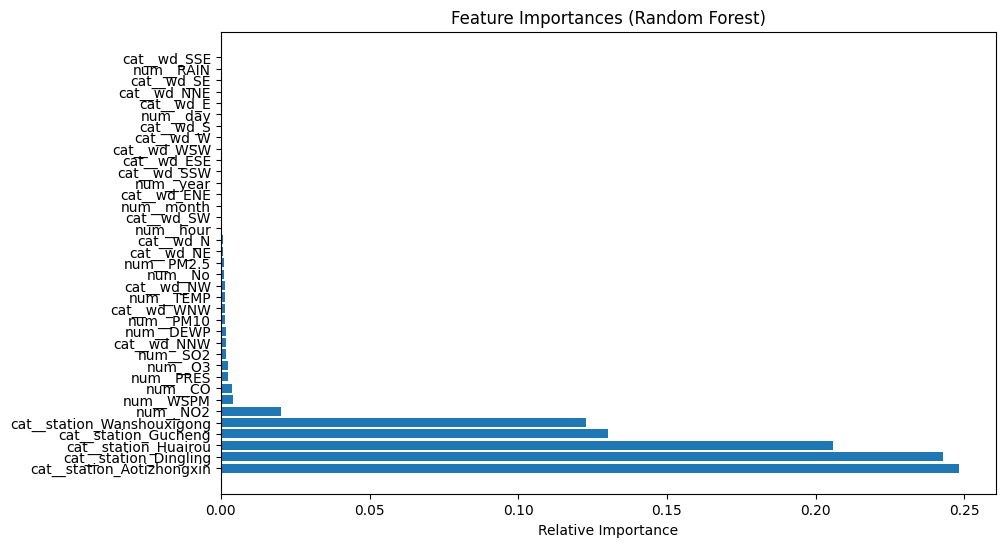

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the best Random Forest model
importances = best_rf_model.named_steps['model'].feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names after preprocessing
feature_names = best_rf_model.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance using the correct number of features and their names
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Forest)')
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Preprocessing the Data (Scaling and Encoding)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the cleaned dataset
merged_df = pd.read_csv("merged_data.csv")

# Instead of 'Revenue', let's assume 'CO' is the target variable,
# as it's present in the dataset and is a numerical feature that may be relevant for analysis.
# Adjust this to the desired target column if different.
target_column = 'CO'

# Split data into features (X) and target (y)
X = merged_df.drop(columns=[target_column])
y = merged_df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features (impute missing, scale)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

# Preprocessing pipeline for categorical features (impute missing, one-hot encode)
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

Building a Machine Learning Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the cleaned dataset
merged_df = pd.read_csv("merged_data.csv")

# Instead of 'Revenue', let's assume 'CO' is the target variable,
# as it's present in the dataset and is a numerical feature that may be relevant for analysis.
# Adjust this to the desired target column if different.
target_column = 'CO'

# Split data into features (X) and target (y)
X = merged_df.drop(columns=[target_column])
y = merged_df[target_column]

# Remove rows with NaN values in the target variable 'CO' before splitting
merged_df = merged_df.dropna(subset=[target_column])
X = merged_df.drop(columns=[target_column])
y = merged_df[target_column]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features (impute missing, scale)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

# Preprocessing pipeline for categorical features (impute missing, one-hot encode)
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

Feature Selection

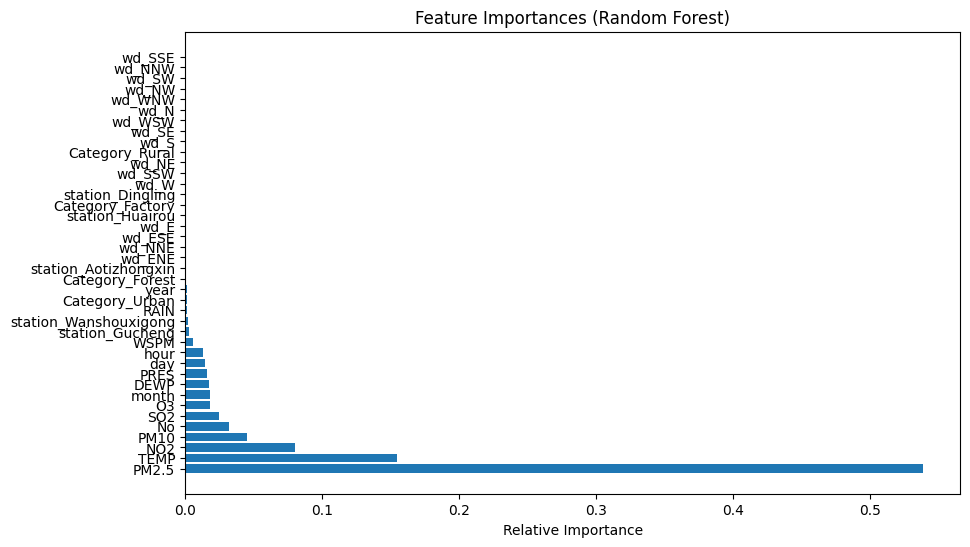

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor # Assuming 'CO' is numerical
from sklearn.pipeline import Pipeline

# Assuming preprocessor, X_train, y_train are already defined

# Create the Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])

# Fit the Random Forest model on the entire training set
rf_pipeline.fit(X_train, y_train)

# Get feature importance from the trained Random Forest model
importances = rf_pipeline.named_steps['model'].feature_importances_

# Get the feature names after transformations
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Get one-hot encoded feature names
onehot_features = rf_pipeline.named_steps['preprocessor'].transformers_[1][1]\
    .named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = np.concatenate([numerical_features, onehot_features])

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Forest)')
plt.barh(range(len(all_feature_names)), importances[indices], align="center")
plt.yticks(range(len(all_feature_names)), all_feature_names[indices])
plt.xlabel('Relative Importance')
plt.show()

Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
}

# Perform GridSearchCV to find the best hyperparameters (Set n_jobs=1 to avoid pickling issue)
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=1)
grid_search_rf.fit(X_train, y_train)

# Display best parameters found by GridSearchCV
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nBest Random Forest Model Test Set Evaluation:")
print(classification_report(y_test, y_pred_best_rf))


Final Evaluation and Model Comparison

In [ ]:
# Fit the best Random Forest model on the entire training set and predict
best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nTest Set Evaluation (Best Random Forest Model):")
print(classification_report(y_test, y_pred_rf))

# For comparison, let's evaluate Logistic Regression on the test set
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)
print("\nTest Set Evaluation (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))


In [ ]:
import joblib
from sklearn.metrics import accuracy_score

# Evaluate accuracy on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Test Set Accuracy: {accuracy:.4f}")

# Save the model using joblib
model_filename = 'best_random_forest_model.pkl'
joblib.dump(best_rf_model, model_filename)

print(f"Model saved to {model_filename}")


In [ ]:
# Load the saved model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test)
